In [2]:
import matplotlib.pyplot as plt
import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es
import keras
import pandas as pd
from keras.layers import  Conv3D, Flatten, Dense, Reshape,MaxPool3D
from keras.layers import Dropout, Input, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import spectral
from time import time
init_notebook_mode(connected=True)

In [3]:

dataset = 'IP'
test_ratio = 0.6
windowSize = 25

In [4]:
def loadData(name):
    if name=='IP':
        data = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
        labels = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
    
    
    return data,labels
data,labels=loadData(dataset)

In [ ]:
def loadData():
    data = sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
    labels = sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
    return data,labels
data,labels=loadData()

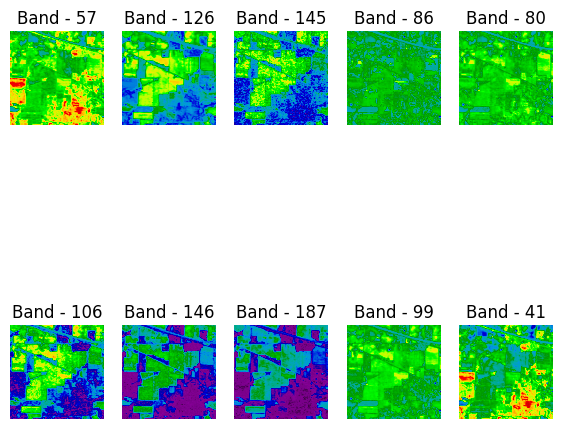

In [8]:


fig = plt.figure(figsize = (7, 7))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(225)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

fig1 = plt.gcf()
plt.show()

fig1.savefig('bandvisualization', dpi=100)



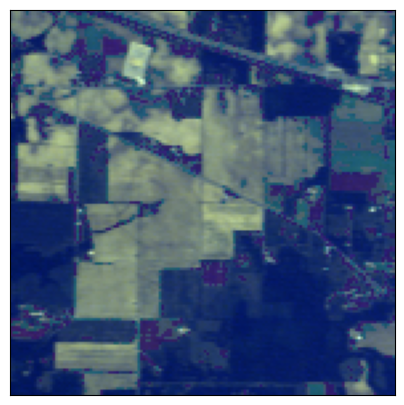

<Axes: >

In [5]:
mdata = np.moveaxis(data, -1, 0)


ep.plot_rgb(mdata, (29, 23, 2), figsize=(5, 5)) 



plt.savefig('rgbcomposite.jpg')


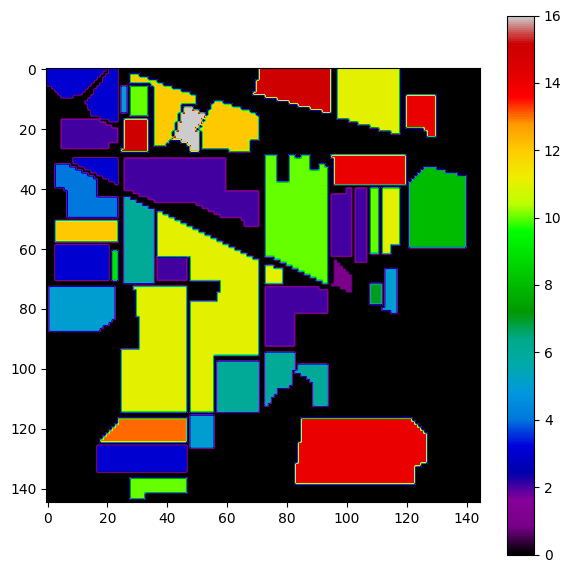

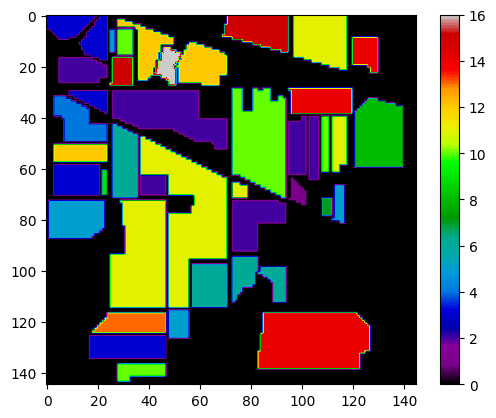

<Figure size 640x480 with 0 Axes>

In [7]:
def plot_data(data):
      fig = plt.figure(figsize=(7, 7))
      fig1 = plt.gcf()
      plt.imshow(data, cmap='nipy_spectral')
      plt.colorbar()
      plt.axis('on')
      plt.show()
      plt.show()
      
      fig1.savefig('Groundtruth', dpi=100)
      plt.imshow(data, cmap='nipy_spectral')
      plt.colorbar()
      plt.axis('on')
      plt.show()

plot_data(labels)

plt.savefig("groundtruth.jpg")